<a href="https://colab.research.google.com/github/taravatp/cats_vs_dogs/blob/main/dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch.utils.data import Dataset,DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
import cv2
from glob import glob
from random import shuffle,seed
seed(10)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
class vgg_dataset(Dataset):
  def __init__(self,dataset_path):
    dataset_path = dataset_path
    cats = glob(dataset_path+'/cats/*.jpg') #glob returns all file paths that match a specific pattern
    dogs = glob(dataset_path+'/dogs/*.jpg')

    self.image_paths = cats[:500] + dogs[:500]
    self.normalize = transforms.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225])
    shuffle(self.image_paths)
    self.targets = [fpath.split('/')[-1].startswith('dog') for fpath in self.image_paths] #it returns true if it starts with dog. otherwise returns false

  def __len__(self):
    return len(self.image_paths) 

  def __getitem__(self,ix):
    image_path = self.image_paths[ix]
    target = self.targets[ix]
    image = cv2.imread(image_path)

    #preprocess the image
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) #convert the order of channles from BGR to RGB
    image = cv2.resize(image,(224,224)) #resizing- so all the input images will have the same size
    image = image/255 #pixel intensity will be in the range of 0-1
    image = np.transpose(image,(2,0,1)) #channles should come first
    image = torch.tensor(image) #convert numpy array to tensor
    image = self.normalize(image)

    return image.float().to(device),torch.tensor([target]).float().to(device)


# experiment the dataset

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'dog')

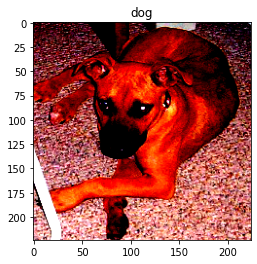

In [ ]:
train_dataset = '/content/drive/MyDrive/cats_vs_dogs/training_set/training_set'
test = vgg_dataset(train_dataset)
image,label = test[300]
label='dog' if label==1 else 'cat'

image = image.permute(1,2,0).cpu()
plt.imshow(image)
plt.title(label)